<img src="https://nserc-hi-am.ca/2020/wp-content/uploads/sites/18/2019/12/McGill.png" width="500" height="400" align="left">

#### Date: February 5th, 2021

**Objective:**

In this assignment you are an analytics consultant to a (i) brand manager, (ii) product manager and (iii) advertising manager. Your job is to give advice/insights to these individuals based on the analysis of social media conversations. The detailed tasks are described below.

Develop a crawler/scraper to fetch messages posted in Edmunds.com discussion forums. The crawler output should be a .csv file with the following columns: date, userid, and message (even though you will only use the messages in your analysis).

Fetch around 5,000 posts about cars from a General topics forum. Do NOT choose a forum dedicated to a particular brand or model. Instead, you can choose the General & Sedans categories and then select, for example, the Entry Level Luxury forum (https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance- sedans). The idea is to have multiple brands and models being discussed without one of them being the focal point.

In [1]:
# Import the Data Frame
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# nltk.download('all')
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set( stopwords.words('english') + list(punctuation))

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
reviews = pd.read_csv(r"C:\Users\foteh\OneDrive\Desktop\MMA Winter1'21\INSY669\preprocessed_dataset.csv")
reviews = reviews.dropna().reset_index()

models = pd.read_csv(r"C:\Users\foteh\OneDrive\Desktop\MMA Winter1'21\INSY669\models_.csv")
models = models.drop_duplicates()

attributes = pd.read_csv(r"C:\Users\foteh\OneDrive\Desktop\MMA Winter1'21\INSY669\attribute.csv")
attributes = attributes.drop_duplicates()

# Dictionary to hold Brand and model values
models_dict = pd.Series(models['brand'].values, index=models['model']).to_dict()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\foteh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\foteh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Task A

In [2]:
def comments(comment):
  tokens = word_tokenize(comment)
  stopwords = [w.lower() for w in tokens if w not in stop_words]
  replace_model = [models_dict[x] if x in models_dict else x for x in stopwords]
  return list(set(replace_model))

In [3]:
reviews

,index,Unnamed: 0,Counter,Date,User,Comment
0,0,0,1,"April 11, 2007 6:52PM",\nmotownusa,hi pat : forgot chrysler chrysler
1,1,1,2,"April 11, 2007 7:33PM",\nexshoman,'m sure folk would appreciate chevrolet chevro...
2,2,2,3,"April 12, 2007 6:51AM",\ntargettuning,try revive topic without able discus ( however...
3,3,3,4,"April 12, 2007 8:43AM",\npat,model vs. model exactly 're ! manufacturer vs....
4,4,4,5,"April 13, 2007 11:49AM",\nperna,nissan favorite bunch . amongst fastest best h...
...,...,...,...,...,...,...
4992,4995,4995,4996,"September 12, 2007 12:49PM",\nkdshapiro,'' let try time . honda toyota toyota dominant...
4993,4996,4996,4997,"September 12, 2007 12:55PM",\nbenderofbows,'' like repair car fail see huge hassle unless...
4994,4997,4997,4998,"September 12, 2007 1:24PM",\njimlockey,"toyota & gm give guy have.ford dead , n't know..."
4995,4998,4998,4999,"September 12, 2007 2:21PM",\ncaptain2,weakness ? goota kidding - car well others wea...


In [4]:
reviews['filtered_comments'] = reviews['Comment'].map(comments)

In [5]:
reviews.head()

,index,Unnamed: 0,Counter,Date,User,Comment,filtered_comments
0,0,0,1,"April 11, 2007 6:52PM",\nmotownusa,hi pat : forgot chrysler chrysler,"[forgot, hi, chrysler, pat]"
1,1,1,2,"April 11, 2007 7:33PM",\nexshoman,'m sure folk would appreciate chevrolet chevro...,"[would, 'm, folk, included, well, chevrolet, a..."
2,2,2,3,"April 12, 2007 6:51AM",\ntargettuning,try revive topic without able discus ( however...,"[.., verse, issue, discussion, revive, heated,..."
3,3,3,4,"April 12, 2007 8:43AM",\npat,model vs. model exactly 're ! manufacturer vs....,"[need, discussion, happening, vehicle, already..."
4,4,4,5,"April 13, 2007 11:49AM",\nperna,nissan favorite bunch . amongst fastest best h...,"[honda, inside, 'll, bunch, still, need, kind,..."


In [6]:
from collections import Counter
x=reviews['filtered_comments']
text = x.apply(pd.Series).stack().reset_index(drop=True)
word_frequency = Counter(text)
common_words = word_frequency.most_common()

In [7]:
brands = {}
for word, count in common_words:
  if word in models['brand'].values:
    brands[word] = count

In [8]:
df_brand = pd.DataFrame.from_dict(brands, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_brand.head()

,frequency
honda,2084
ford,1347
toyota,970
hyundai,593
nissan,579


In [9]:
top_ten = df_brand[:10]
top_ten_brands = top_ten.index.values
top_ten_brands

array(['honda', 'ford', 'toyota', 'hyundai', 'nissan', 'mazda',
       'chevrolet', 'chrysler', 'subaru', 'kia'], dtype=object)

In [10]:
for brand in top_ten_brands:
  reviews[brand] = reviews['filtered_comments'].map(lambda x: 1 if brand in x else 0)

In [11]:
lift_matrix = pd.DataFrame(index=top_ten_brands, columns=top_ten_brands)

for brand_ in top_ten_brands:
  freq_brand_ = sum(reviews[brand_] == 1)
  for brand_1 in top_ten_brands:
    if brand_ == brand_1:
      lift_matrix.loc[brand_, brand_1] = 1
    else:
      freq_brand_1 = sum(reviews[brand_1] == 1)
      freq_both = sum( (reviews[brand_] == 1) & (reviews[brand_1] == 1 ) )
      lift = len(reviews) * freq_both / (freq_brand_ * freq_brand_1)
      lift_matrix.loc[brand_, brand_1] = lift

In [12]:
lift_matrix

,honda,ford,toyota,hyundai,nissan,mazda,chevrolet,chrysler,subaru,kia
honda,1,1.1624,1.71059,1.43544,1.42874,1.14021,1.34081,1.37631,1.35066,1.27156
ford,1.1624,1,1.40358,1.16359,1.1661,1.16091,1.34761,1.29757,0.845254,1.12416
toyota,1.71059,1.40358,1,1.86776,2.16205,0.936645,1.91343,1.29366,1.17377,1.52205
hyundai,1.43544,1.16359,1.86776,1,1.58636,1.0607,1.78851,1.66266,1.86666,5.1709
nissan,1.42874,1.1661,2.16205,1.58636,1,1.40319,1.93744,1.12234,1.9118,1.4384
mazda,1.14021,1.16091,0.936645,1.0607,1.40319,1,0.927087,0.744324,3.1516,0.728001
chevrolet,1.34081,1.34761,1.91343,1.78851,1.93744,0.927087,1,2.01215,1.54906,1.85417
chrysler,1.37631,1.29757,1.29366,1.66266,1.12234,0.744324,2.01215,1,0.992763,2.71613
subaru,1.35066,0.845254,1.17377,1.86666,1.9118,3.1516,1.54906,0.992763,1,1.91676
kia,1.27156,1.12416,1.52205,5.1709,1.4384,0.728001,1.85417,2.71613,1.91676,1


C:\Users\foteh\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


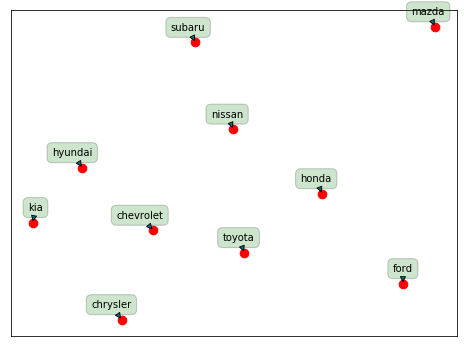

In [13]:
dissimilarity_mtx = 1/lift_matrix
np.fill_diagonal(dissimilarity_mtx.values, 0)

from sklearn import manifold
from sklearn.manifold import MDS
mds=manifold.MDS(n_components=2, dissimilarity ='euclidean', random_state=10)
results=mds.fit(dissimilarity_mtx)
coordinates=results.embedding_

x = coordinates[:,0]
y = coordinates[:,1]

plt.figure(figsize=(8,6))
plt.scatter(x,y, marker='o', color='red', s=75)

for brand, x_coord, y_coord in zip(list(top_ten_brands), x, y):
  plt.annotate(s=brand, 
               xy=(x_coord,y_coord),
               xytext = (10, 10),
               textcoords = 'offset points', 
               ha = 'right', 
               va = 'bottom',
               bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
               arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=0'))

plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
dissimilarity_mtx

,honda,ford,toyota,hyundai,nissan,mazda,chevrolet,chrysler,subaru,kia
honda,0,0.860286,0.584594,0.69665,0.699919,0.877032,0.74582,0.72658,0.740381,0.786438
ford,0.860286,0,0.712466,0.859409,0.857562,0.861393,0.742052,0.77067,1.18308,0.889554
toyota,0.584594,0.712466,0,0.5354,0.462524,1.06764,0.522621,0.773,0.851956,0.65701
hyundai,0.69665,0.859409,0.5354,0,0.630373,0.942777,0.559124,0.601447,0.535716,0.19339
nissan,0.699919,0.857562,0.462524,0.630373,0,0.71266,0.516146,0.890997,0.523068,0.695217
mazda,0.877032,0.861393,1.06764,0.942777,0.71266,0,1.07865,1.3435,0.317299,1.37362
chevrolet,0.74582,0.742052,0.522621,0.559124,0.516146,1.07865,0,0.49698,0.645554,0.539324
chrysler,0.72658,0.77067,0.773,0.601447,0.890997,1.3435,0.49698,0,1.00729,0.368171
subaru,0.740381,1.18308,0.851956,0.535716,0.523068,0.317299,0.645554,1.00729,0,0.521713
kia,0.786438,0.889554,0.65701,0.19339,0.695217,1.37362,0.539324,0.368171,0.521713,0


# Task B

Looking at the MDS plot, it seems like brands such as Mazda and Ford are very unique in their own way as they are really far away on the plot compared to the other brands. There is something that they are doing that makes them stand out when customers talk about companies selling Sedans.

On another note, it seems like the most popular brands when it comes to sedans are asian, since a majority of the comment mentions are the ones that are made there. Chrysler, Chevrolet and Ford are the only companies that are not based in Asia.

# Task C

In [15]:
attributes = attributes.drop_duplicates()

In [16]:
attribute_dict = pd.Series(attributes['Attributes'].values, index=attributes['Category']).to_dict()

In [17]:
def attribute_replace(comment):
  attribute_text = [attribute_dict[x] if x in attribute_dict  else x for x in comment]
  return list(set(attribute_text))

In [18]:
reviews['attribute_comments'] = reviews['filtered_comments'].map(attribute_replace)

In [19]:
from collections import Counter
x=reviews['attribute_comments']
attribute_text = x.apply(pd.Series).stack().reset_index(drop=True)
word_frequency = Counter(text)
common_words = word_frequency.most_common()

In [20]:
all_attributes = {}
for word, count in common_words:
  if word in attributes['Attributes'].values:
    all_attributes[word] = count

In [21]:
attribute_df = pd.DataFrame.from_dict(all_attributes, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)

In [22]:
attribute_df

,Frequency
good,893
new,823
engine,612
value,350
problem,343
interior,307
mileage,268
reliability,237
quality,230
transmission,222


In [23]:
for brand in top_ten_brands:
  reviews[brand] = reviews['filtered_comments'].map(lambda x: 1 if brand in x else 0)

In [24]:
atr = attribute_df[:10]
top_ten_attribute = atr.index.values
top_ten_attribute

array(['good', 'new', 'engine', 'value', 'problem', 'interior', 'mileage',
       'reliability', 'quality', 'transmission'], dtype=object)

In [26]:
for atr in top_ten_attribute:
    reviews[atr] = reviews['attribute_comments'].map(lambda x: 1 if atr in x else 0)

In [27]:
attribute_matrix = pd.DataFrame(index=top_ten_brands, columns=top_ten_attribute)

for brand in top_ten_brands:
  freq_brand = sum(reviews[brand] == 1)
  for atr in top_ten_attribute:
    freq_attr = sum(reviews[atr] == 1)
    freq_both = sum( (reviews[brand] == 1) & (reviews[atr] == 1 ) )
    lift = len(reviews) * freq_both / (freq_brand * freq_attr)
    attribute_matrix.loc[brand, atr] = lift

In [28]:
attribute_matrix

,good,new,engine,value,problem,interior,mileage,reliability,quality,transmission
honda,1.24052,1.25571,1.00692,1.43868,1.22336,1.51522,1.29731,1.36583,1.35527,1.14489
ford,1.19642,1.22155,1.58815,1.22951,1.29786,1.14796,1.6057,1.3618,1.48389,1.23658
toyota,1.30952,1.44594,1.18688,1.60434,1.23157,1.3592,1.42244,1.6085,1.97103,1.11385
hyundai,1.4815,1.27987,0.950063,2.02239,0.908997,2.05863,0.911838,1.03111,1.06249,0.721199
nissan,1.37236,1.57298,1.4384,1.13428,1.05678,1.60239,0.966089,1.05604,1.01313,1.4384
mazda,1.34024,1.33747,1.14196,1.69728,1.01878,1.59354,0.945315,1.21641,0.645705,1.61341
chevrolet,1.69014,2.42868,1.59968,1.3403,1.18927,1.92665,1.21767,0.774529,0.798101,1.19436
chrysler,1.10409,1.198,1.42797,1.28046,1.37192,1.5328,1.42141,1.04004,2.33823,1.51406
subaru,1.91247,1.076,1.29194,1.1747,1.19868,1.85433,1.53413,1.20101,1.23756,2.56432
kia,1.48372,1.42593,1.4227,0.973442,0.772573,2.71281,1.69505,0.638921,2.79806,1.19366


# Task D
i) Project Manager: A project manager at Hyundai should consider investing more money in improving their car's engine, since it seems like Hyundai and engine are not words that were used often together by Edmunds users. Using that information, we can infer that the brand's engine are not quite the best, meaning that some engineers could spend some more time improving them. <br> <br>
ii) Marketing Manager: A marketing manager at Kia should use the fact that his cars are very high quality for their advertisements to possible customers. The use of the words Kia and quality are very commonly used together, meaning that we can imply that the brand offers high end products.

# Task E

Looking at the output from Task C, it seems like there are only two brands that stand out in terms of cars customers want to own: Hyundai and Kia. If a client for example is looking to get the most from out of his money, he should be buying a Hyundai, since that brand has the highest value when we look at the comments from the Edmunds website. If a client is looking for a brand that are high end, Kia is the way to go, since it has the highest quality while having the least amount of problems, once again looking at the comments from the Edmunds website.